# Mushroom
---

#### Name: 沈家駿
#### Student ID: 0712223

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

## Data Input
Read data with pandas and consider "?" as NaN.

In [2]:
data = pd.read_csv("agaricus-lepiota.data", header=None, na_values = ['?'])
# data.head()

## Data visualization

Create a list to store the names of the features.

In [3]:
featureData = '''cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises?: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r, missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d'''
featureData = featureData.split('\n')
features = [f[:f.find(': ')] for f in featureData]

Show the data distribution.<br>There are 22 charts to show the distributions of 22 features.

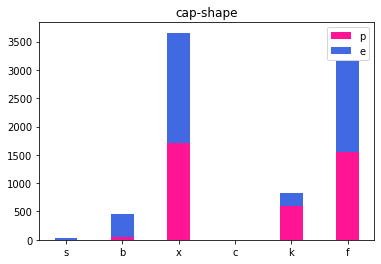

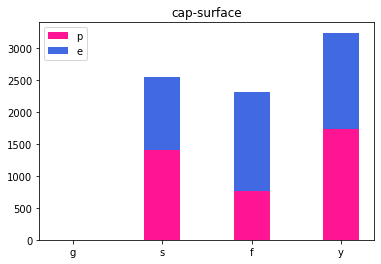

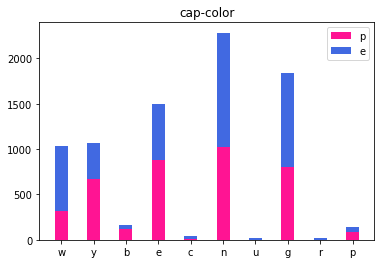

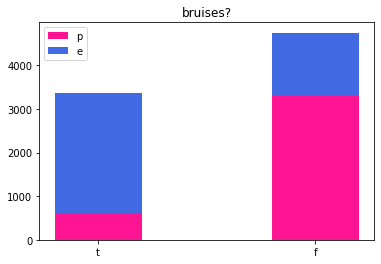

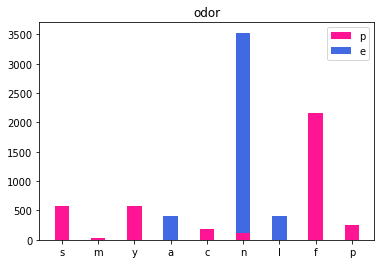

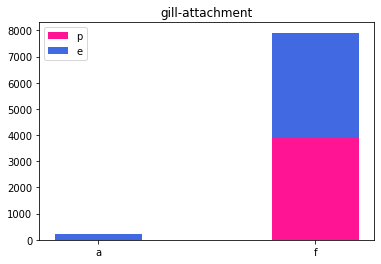

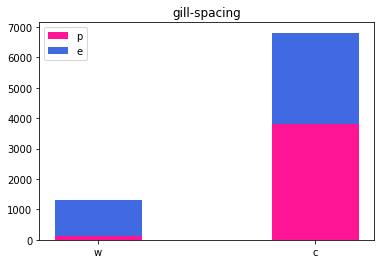

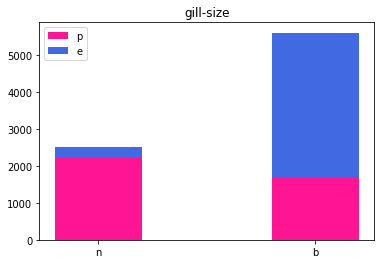

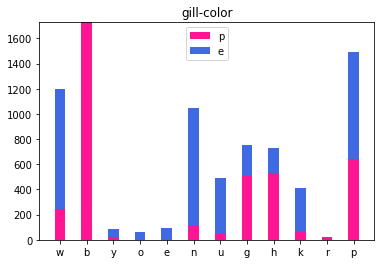

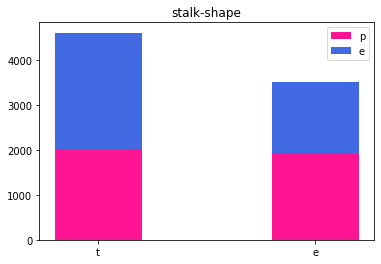

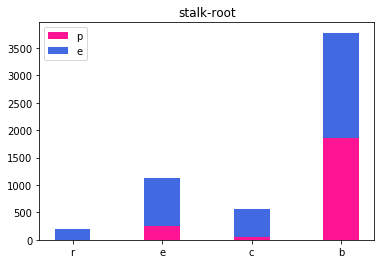

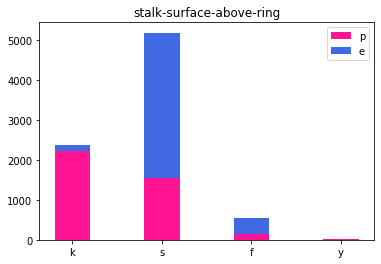

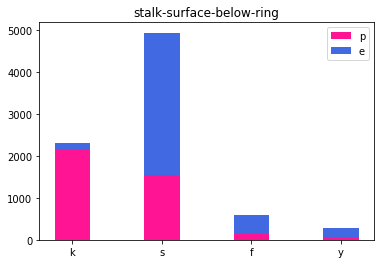

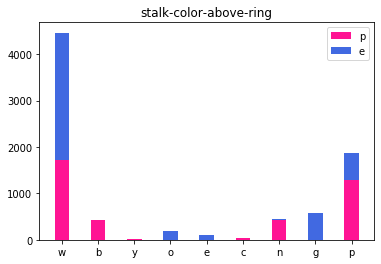

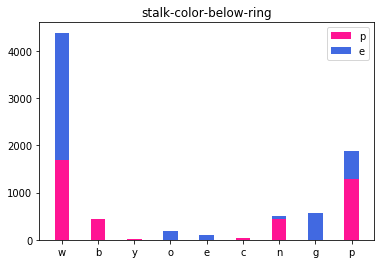

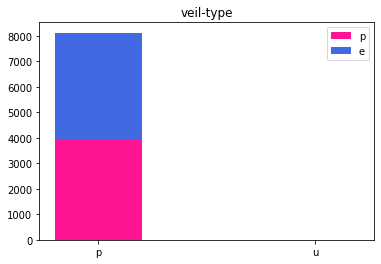

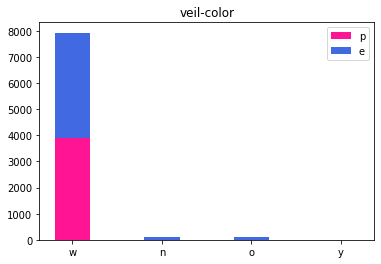

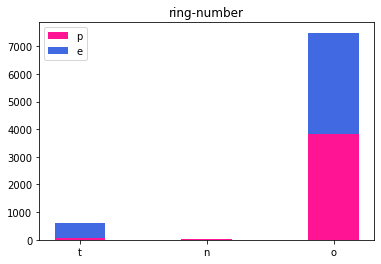

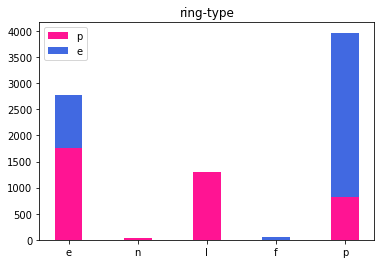

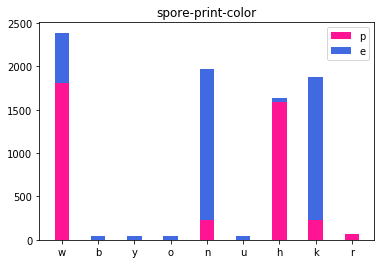

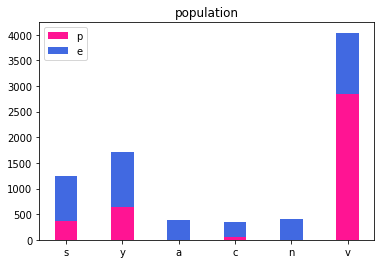

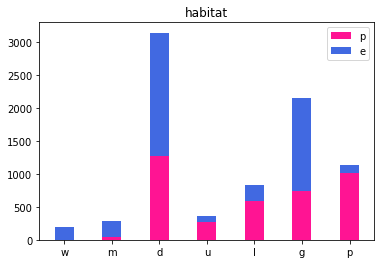

In [4]:
for i in range(1,23):
    d_p = dict(data[data[0]=='p'][i].value_counts())
    d_e = dict(data[data[0]=='e'][i].value_counts())
    keys = list(set(list(d_p)+list(d_e)))
    if i == 16:
        keys.append('u')
    val_p = np.array([d_p.get(key, 0) for key in keys])
    val_e = np.array([d_e.get(key, 0) for key in keys])
    
    plt.bar(keys,val_p,color='deeppink',label='p',width = 0.4)
    plt.bar(keys,val_e,color='royalblue',label='e',bottom=val_p,width = 0.4)
    plt.legend(['p','e'])
    plt.title(features[i-1])
    plt.show()

## Data Preprocessing
Drop features with any missing value.(stalk-root)

In [5]:
new_df = data.dropna(axis=1,how='any')

Transform data format with labelencoder.

In [6]:
le = LabelEncoder()
new_df = new_df.apply(le.fit_transform)

Divide the data into X(features) and y(labels).

In [7]:
X = new_df.iloc[:,1:].to_numpy()
y = new_df.iloc[:,0].to_numpy()

## Model Construction

In [8]:
cnb = sklearn.naive_bayes.CategoricalNB(alpha=1e-9)
cnb_laplace = sklearn.naive_bayes.CategoricalNB(alpha=1)

## Train-Test-Split

### Holdout validation

#### Split

In [9]:
X_train_Holdout, X_test_Holdout, y_train_Holdout, y_test_Holdout = train_test_split(X, y, test_size=0.3)

#### Fitting

In [10]:
y_pred_Holdout_Laplace = cnb_laplace.fit(X_train_Holdout, y_train_Holdout).predict(X_test_Holdout)
y_pred_Holdout = cnb.fit(X_train_Holdout, y_train_Holdout).predict(X_test_Holdout)

### K-fold cross-validation

#### Splitting, Fitting and Calculating the metrics

In [11]:
kf = KFold(n_splits=3, shuffle = True)

cm_KfoldSum = np.zeros([2,2])
cm_KfoldSum_laplace = np.zeros([2,2])
acc_KfoldSum = 0
acc_KfoldSum_laplace = 0
pc_KfoldSum = np.zeros([2])
pc_KfoldSum_laplace = np.zeros([2])
recall_KfoldSum = np.zeros([2])
recall_KfoldSum_laplace = np.zeros([2])

for train_index, test_index in kf.split(X):
    X_train_Kfold, X_test_Kfold = X[train_index], X[test_index]
    y_train_Kfold, y_test_Kfold = y[train_index], y[test_index]
    
    cnb = sklearn.naive_bayes.CategoricalNB(alpha=1e-9)
    cnb_laplace = sklearn.naive_bayes.CategoricalNB(alpha=1)
 
    cnb.fit(X_train_Kfold, y_train_Kfold)
    cnb_laplace.fit(X_train_Kfold, y_train_Kfold)

    y_pred_Kfold = cnb.predict(X_test_Kfold)
    y_pred_Kfold_laplace = cnb_laplace.predict(X_test_Kfold)

    cm = sklearn.metrics.confusion_matrix(y_test_Kfold, y_pred_Kfold).transpose()
    cm_KfoldSum += np.array(cm)
    cm = sklearn.metrics.confusion_matrix(y_test_Kfold, y_pred_Kfold_laplace).transpose()
    cm_KfoldSum_laplace += np.array(cm)

    acc_KfoldSum += sklearn.metrics.accuracy_score(y_test_Kfold, y_pred_Kfold)
    acc_KfoldSum_laplace += sklearn.metrics.accuracy_score(y_test_Kfold, y_pred_Kfold_laplace)
    
    precision_temp, recall_temp, _, _ = sklearn.metrics.precision_recall_fscore_support(y_test_Kfold, y_pred_Kfold)
    pc_KfoldSum += np.array(precision_temp)
    recall_KfoldSum += np.array(recall_temp)
    precision_temp, recall_temp, _, _ = sklearn.metrics.precision_recall_fscore_support(y_test_Kfold, y_pred_Kfold_laplace)
    pc_KfoldSum_laplace += np.array(precision_temp)
    recall_KfoldSum_laplace += np.array(recall_temp)
    
cm_Kfold = cm_KfoldSum/3
acc_Kfold = acc_KfoldSum/3
pc_Kfold = pc_KfoldSum/3
recall_Kfold = recall_KfoldSum/3

cm_Kfold_laplace = cm_KfoldSum_laplace/3
acc_Kfold_laplace = acc_KfoldSum_laplace/3
pc_Kfold_laplace = pc_KfoldSum_laplace/3
recall_Kfold_laplace = recall_KfoldSum_laplace/3

## Results 

### Show the confusion matices

In [12]:
rowInds = list(map(lambda x: 'Predicted '+x, ['edible','poisonous']))
colNames = list(map(lambda x: 'Actual '+x, ['edible','poisonous']))

cmHoldout = sklearn.metrics.confusion_matrix(y_test_Holdout, y_pred_Holdout).transpose()
print('Confusion matrix of Holdout validation without Laplace smoothing')
display(pd.DataFrame(cmHoldout, index=rowInds, columns=colNames))

cmHoldout_Laplace = sklearn.metrics.confusion_matrix(y_test_Holdout, y_pred_Holdout_Laplace).transpose()
print('Confusion matrix of Holdout validation with Laplace smoothing')
display(pd.DataFrame(cmHoldout_Laplace, index=rowInds, columns=colNames))

print('Confusion matrix of K-fold cross-validation without Laplace smoothing')
display(pd.DataFrame(cm_Kfold, index=rowInds, columns=colNames))

print('Confusion matrix of K-fold cross-validation with Laplace smoothing')
display(pd.DataFrame(cm_Kfold_laplace, index=rowInds, columns=colNames))

Confusion matrix of Holdout validation without Laplace smoothing


,Actual edible,Actual poisonous
Predicted edible,1304,0
Predicted poisonous,7,1127


Confusion matrix of Holdout validation with Laplace smoothing


,Actual edible,Actual poisonous
Predicted edible,1304,87
Predicted poisonous,7,1040


Confusion matrix of K-fold cross-validation without Laplace smoothing


,Actual edible,Actual poisonous
Predicted edible,1394.666667,1.000000
Predicted poisonous,8.000000,1304.333333


Confusion matrix of K-fold cross-validation with Laplace smoothing


,Actual edible,Actual poisonous
Predicted edible,1394.333333,102.333333
Predicted poisonous,8.333333,1203.000000


### Show the accuracy

In [13]:
acc_holdout = sklearn.metrics.accuracy_score(y_test_Holdout, y_pred_Holdout)
acc_holdout_laplace = sklearn.metrics.accuracy_score(y_test_Holdout, y_pred_Holdout_Laplace)
print('Accuracy')
display(pd.DataFrame(np.array([[acc_holdout,acc_Kfold],[acc_holdout_laplace,acc_Kfold_laplace,]]), index=['w/o laplace', 'w/ laplace'], columns=['Holdout validation','K-fold cross-validation']))

Accuracy


,Holdout validation,K-fold cross-validation
w/o laplace,0.997129,0.996677
w/ laplace,0.961444,0.959133


### Show the sensitivities(recalls) and precisions

In [14]:
# Calculate the recall and the precision of the holdout
pc_Holdout, recall_Holdout, _, _ = sklearn.metrics.precision_recall_fscore_support(y_test_Holdout, y_pred_Holdout)
pc_Holdout_laplace, recall_Holdout_laplace, _, _ = sklearn.metrics.precision_recall_fscore_support(y_test_Holdout, y_pred_Holdout_Laplace)

print('Sensitivity(Recall)')
display(pd.DataFrame(np.array([recall_Holdout,recall_Holdout_laplace,recall_Kfold,recall_Kfold_laplace]), index=['Holdout without Laplace','Holdout with Laplace','K-fold  without Laplace', 'K-fold  with Laplace'], columns=['edible','poisonous']))

print('Precision')
display(pd.DataFrame(np.array([pc_Holdout,pc_Holdout_laplace,pc_Kfold,pc_Kfold_laplace]), index=['Holdout without Laplace','Holdout with Laplace','K-fold  without Laplace', 'K-fold  with Laplace'], columns=['edible','poisonous']))

Sensitivity(Recall)


,edible,poisonous
Holdout without Laplace,0.994661,1.000000
Holdout with Laplace,0.994661,0.922804
K-fold without Laplace,0.994284,0.999241
K-fold with Laplace,0.994044,0.921678


Precision


,edible,poisonous
Holdout without Laplace,1.000000,0.993827
Holdout with Laplace,0.937455,0.993314
K-fold without Laplace,0.999277,0.993917
K-fold with Laplace,0.931605,0.993128


## Comparison & Conclusion
From the results, the performances of experiments with the Laplace smoothing will be lower.

## Questions 
### Show 𝑃(𝑋𝑠𝑡𝑎𝑙𝑘−𝑐𝑜𝑙𝑜𝑟−𝑏𝑒𝑙𝑜𝑤−𝑟𝑖𝑛𝑔|𝑌=𝑒) with and without Laplace smoothing by bar charts
𝜏 = 9, k=10
- Without Laplace smoothing
<br> $𝑃(𝑋_𝑖|𝑌)=\frac{𝑁(𝑋_𝑖|𝑌)}{𝑁(𝑌)}$
- Laplace smoothing
<br> $𝑃(𝑋_𝑖|𝑌)=\frac{𝑁(𝑋_𝑖|𝑌)+𝑘}{𝑁(𝑌)+𝑘𝜏}$

#### Setting parameters

In [15]:
N_Y = len(data[data[0]=='e'])
X_i = data[15].unique()
tau = len(X_i)
k = 10
N_Xi_Y_dict = dict(data[data[0]=='e'][15].value_counts())
tempKeys = list(N_Xi_Y_dict.keys())
for x in X_i:
    if x not in tempKeys:
        N_Xi_Y_dict[x] = 0

#### Show the bar charts
You can find that features b, y, c that didn't appear originally have a non-zero likelihood probability after laplace smoothing.

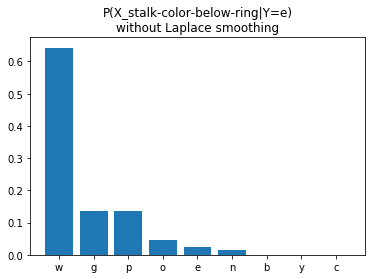

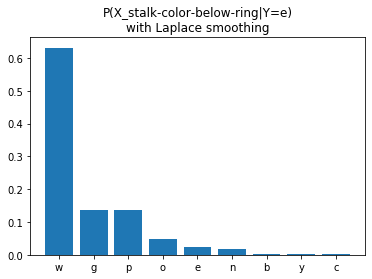

In [16]:
keys = list(N_Xi_Y_dict.keys())

vals = list(map(lambda x: x/N_Y, list(N_Xi_Y_dict.values())))

plt.bar(keys,vals)
plt.title('P(X_stalk-color-below-ring|Y=e)\nwithout Laplace smoothing')
plt.show()

vals = list(map(lambda x: (x+k)/(N_Y+k*tau), list(N_Xi_Y_dict.values())))

plt.bar(keys,vals)
plt.title('P(X_stalk-color-below-ring|Y=e)\nwith Laplace smoothing')
plt.show()